# Time Series Data

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023178,182.197418,179.998201,181.261998,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500
2024-01-09,184.237411,184.247357,181.839157,183.023358,42841800
2024-01-10,185.282288,185.491255,183.023350,183.451262,46792900
2024-01-11,184.685211,186.138100,182.724814,185.630577,49128400


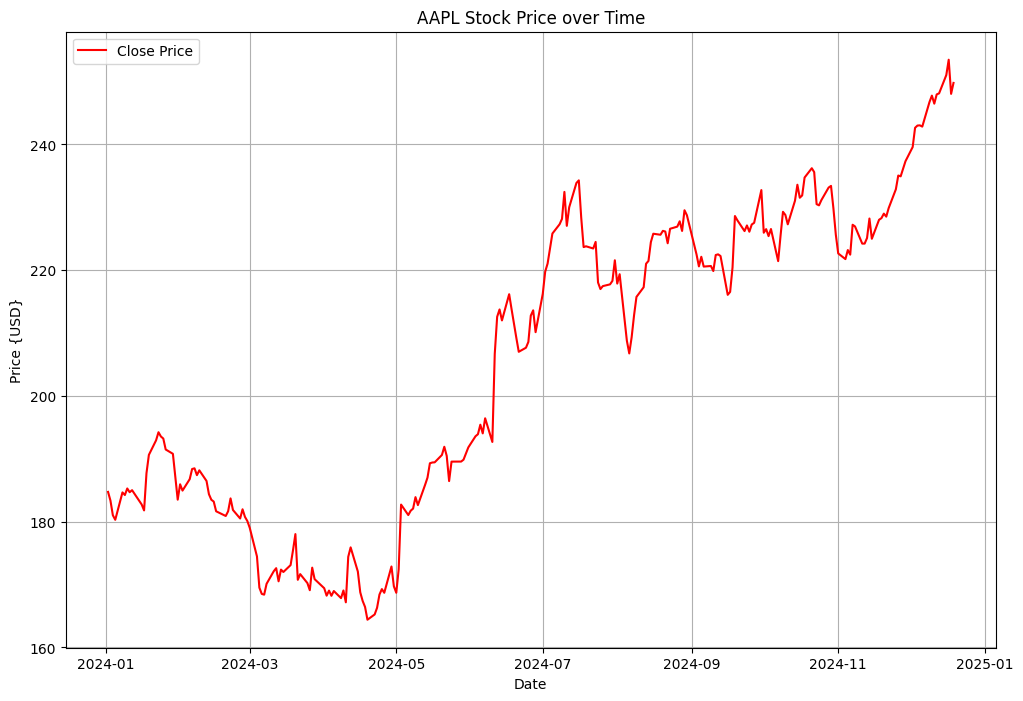

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price over Time')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [7]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

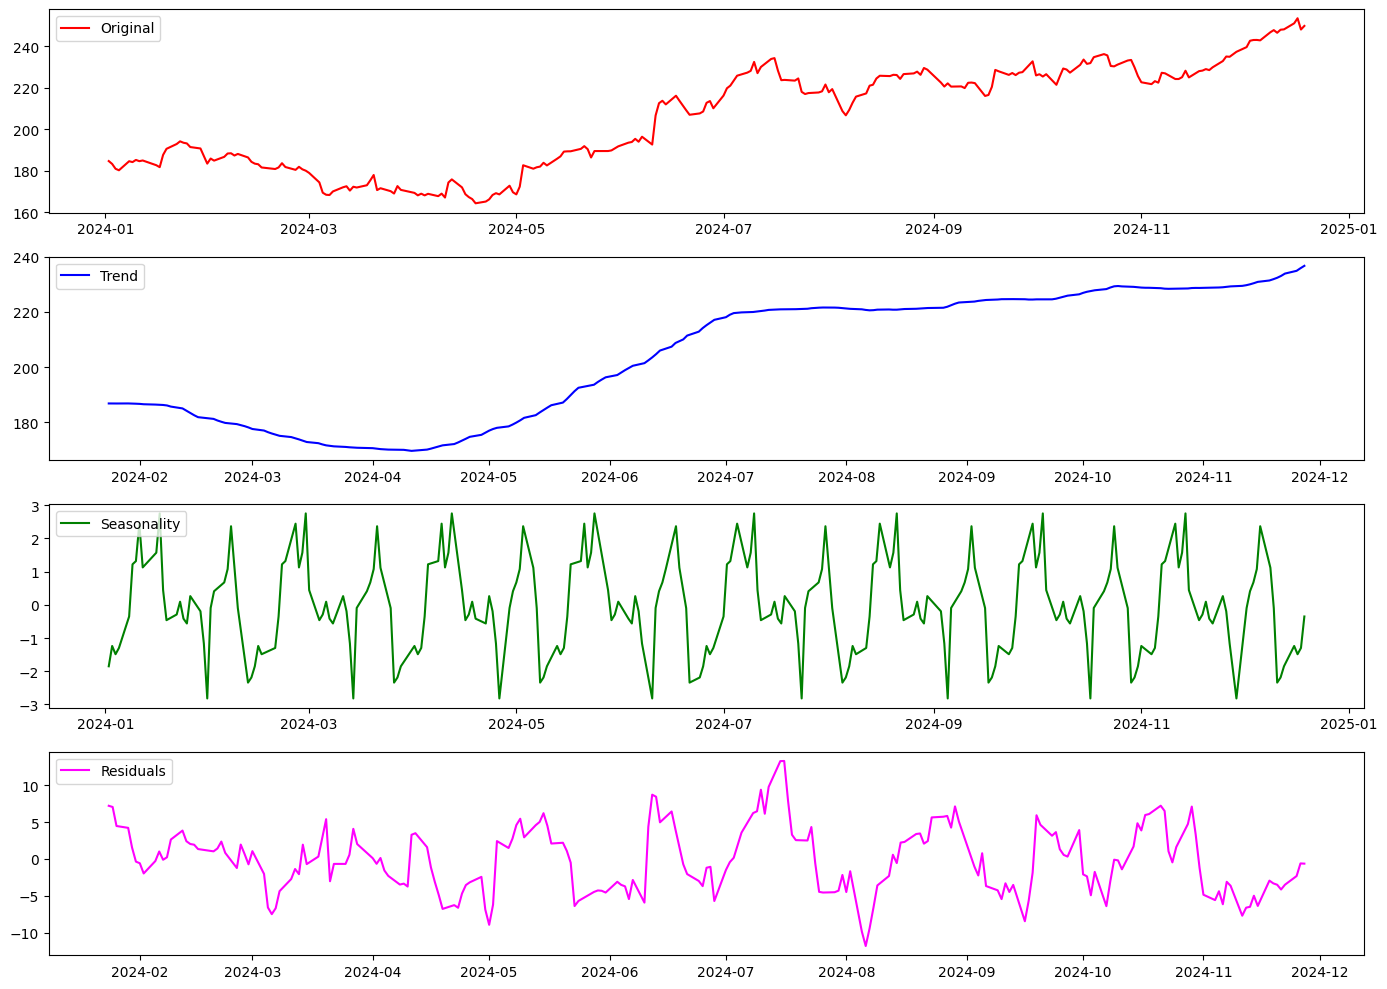

In [24]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residuals', color='magenta')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

In [17]:
from statsmodels.tsa.seasonal import STL

In [19]:
# Perform STL decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

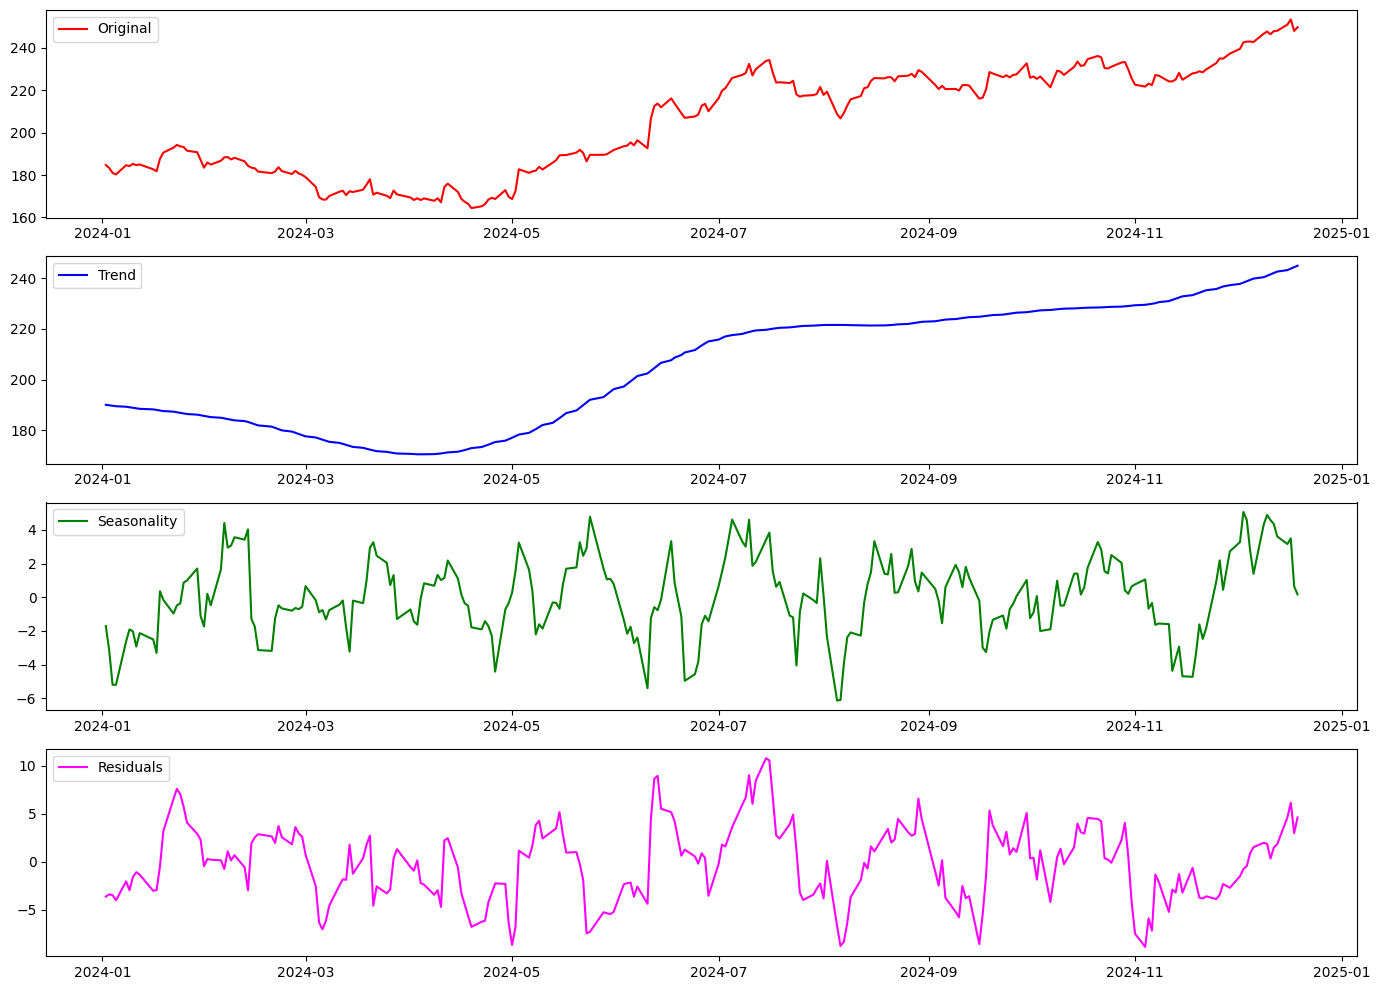

In [23]:
# Plot the STL decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals', color='magenta')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Stationarity Test

### Weak Stationarity Test

In [30]:
from statsmodels.tsa.stattools import adfuller

# persforming Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistics: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'      {key}: {round(value, 3)}')

ADF Test Results:
ADF Statistics: -0.205
p-value: 0.938
Critical Values:
      1%: -3.457
      5%: -2.873
      10%: -2.573


In [31]:
from statsmodels.tsa.stattools import kpss

# performing KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant {level stationary}, 'ct' for constant and trend {trend stationary}

print('KPSS Test Results:')
print(f'KPSS Statistics: {round(kpss_test[0], 2)}')
print(f'p-value: {(kpss_test[1])}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
    print(f'      {key}: {round(value, 3)}')

KPSS Test Results:
KPSS Statistics: 0.2
p-value: 0.014509599963591779
Critical Values:
      10%: 0.119
      5%: 0.146
      2.5%: 0.176
      1%: 0.216


### Strong Stationarity Test

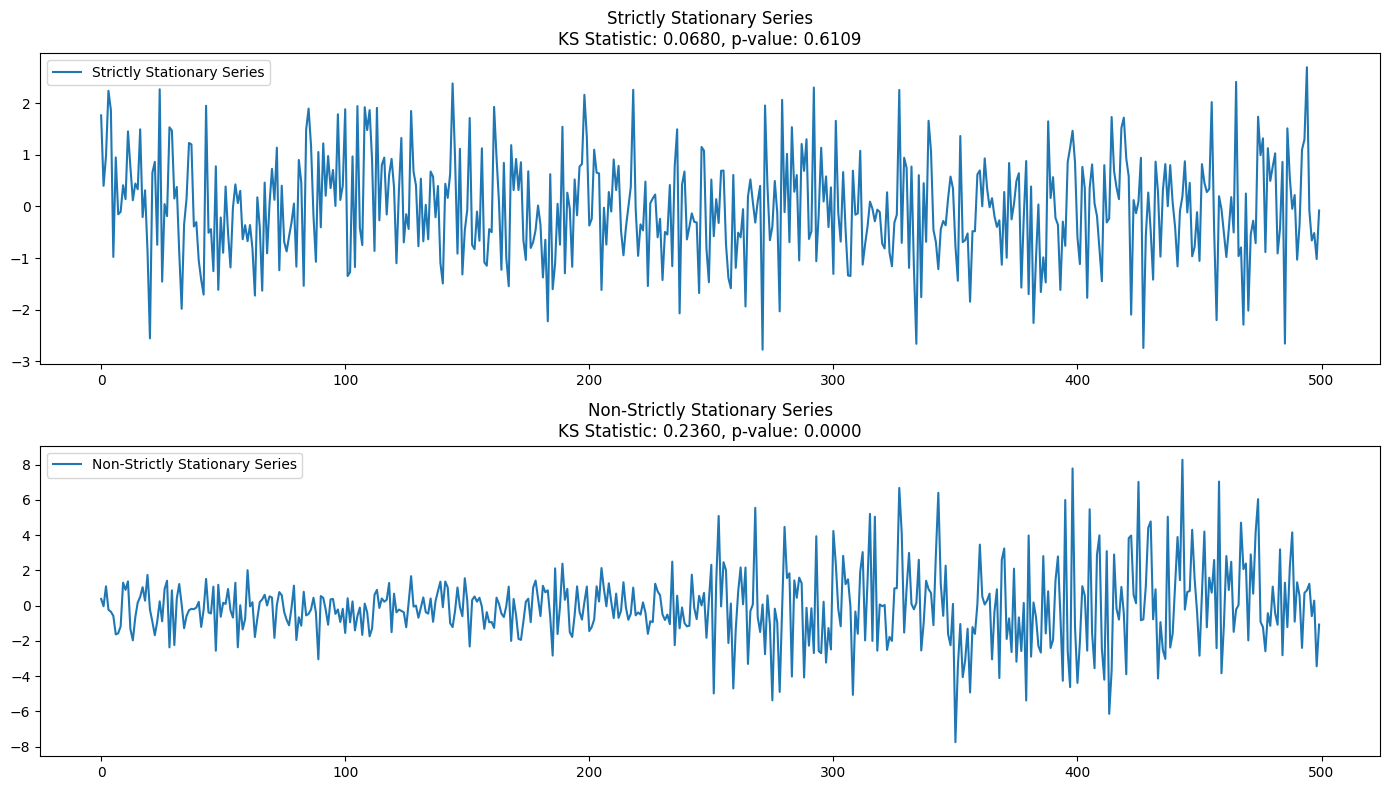

Strictly Stationary Series - KS Test Statistics: 0.0680, p-value: 0.6109101078
Non-Strictly Stationary Series - KS Test Statistics: 0.2360, p-value: 0.0000016178


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Stricly stationary series: normaly distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n//2),
    np.random.normal(0, 3, n//2)
])

# Function to split the data into two halves and perform the Kolmogorov-Smirnov (KS) test
def ks_test_stationary(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the KS test on the stictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationary(strict_stationary_series)

# Perform the KS test on the non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationary(non_strict_stationary_series)

# Plotting the series
plt.figure(figsize=(14, 8))

# Plot strictly stationary series
plt.subplot(2, 1, 1)
plt.plot(strict_stationary_series, label='Strictly Stationary Series')
plt.title(f'Strictly Stationary Series\nKS Statistic: {ks_stat_strict:.4f}, p-value: {ks_pvalue_strict:.4f}')
plt.legend()

# Plot non-strictly stationary series
plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, label='Non-Strictly Stationary Series')
plt.title(f'Non-Strictly Stationary Series\nKS Statistic: {ks_stat_non_strict:.4f}, p-value: {ks_pvalue_non_strict:.4f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Strictly Stationary Series - KS Test Statistics: {ks_stat_strict:.4f}, p-value: {ks_pvalue_strict:.10f}')
print(f'Non-Strictly Stationary Series - KS Test Statistics: {ks_stat_non_strict:.4f}, p-value: {ks_pvalue_non_strict:.10f}') 

# Making Data Stationary

In [58]:
# Performing the Augmented Dickey-Fuller test and KPSS test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
        
def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print(f'Critical Value {key}: {value:.3f}')

In [59]:
prices = stock_data['Close']

In [61]:
adf_test(prices)

ADF Statistic: -0.20544494355090115
p-value: 0.9378694748910192
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [62]:
prices

Ticker,AAPL
Date,
2024-01-02,184.734985
2024-01-03,183.351761
2024-01-04,181.023178
2024-01-05,180.296707
2024-01-08,184.655365
...,...
2024-12-13,248.130005
2024-12-16,251.039993
2024-12-17,253.479996


In [78]:
prices_diff = prices.diff()

In [65]:
prices.diff().diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.945358
2024-01-05,1.602112
2024-01-08,5.085129
...,...
2024-12-13,-1.300003
2024-12-16,2.739990
2024-12-17,-0.469986


In [70]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Convert the DataFrame to a 1-dimensional array
prices = prices.squeeze()

# Log Transformation
prices_log = np.log(prices)

# Square Root Transformation
prices_sqrt = np.sqrt(prices)

# Box-Cox Transformation
prices_boxcox, lam = boxcox(prices[prices > 0])

In [71]:
prices_log

Date
2024-01-02    5.218922
2024-01-03    5.211406
2024-01-04    5.198625
2024-01-05    5.194604
2024-01-08    5.218491
                ...   
2024-12-13    5.513953
2024-12-16    5.525612
2024-12-17    5.535285
2024-12-18    5.513630
2024-12-19    5.520621
Name: AAPL, Length: 245, dtype: float64

In [72]:
prices_sqrt

Date
2024-01-02    13.591725
2024-01-03    13.540744
2024-01-04    13.454485
2024-01-05    13.427461
2024-01-08    13.588796
                ...    
2024-12-13    15.752143
2024-12-16    15.844242
2024-12-17    15.921055
2024-12-18    15.749603
2024-12-19    15.804746
Name: AAPL, Length: 245, dtype: float64

In [75]:
prices_boxcox

array([542.04823744, 536.97556317, 528.45753898, 525.80565314,
       541.75598967, 540.22240012, 544.05796766, 541.8655369 ,
       543.07118364, 534.71595914, 531.25739844, 552.99202654,
       563.75811416, 572.34894504, 577.11633466, 574.60231425,
       573.38313932, 566.9260195 , 564.38404949, 550.82898361,
       537.52248952, 546.50830987, 542.81546711, 549.51012141,
       555.45020411, 555.85406937, 551.85531909, 554.68310565,
       548.44378538, 540.71931796, 537.46769124, 536.40907295,
       530.75765171, 528.02746456, 530.79418544, 538.2711565 ,
       531.52267765, 526.57253859, 531.92346386, 527.51813003,
       525.08195724, 521.12355102, 504.62829867, 486.73582486,
       483.15846886, 482.72960092, 488.92050001, 496.16904166,
       497.89452931, 490.35416647, 497.06761296, 495.70191259,
       499.65730514, 508.16434529, 517.53332592, 491.21476735,
       494.48060491, 489.35056704, 485.26849584, 498.18229076,
       491.60930982, 486.41359787, 482.15776732, 485.05

In [76]:
adf_test(prices_boxcox)

ADF Statistic: -0.17884488305069215
p-value: 0.9409967203392955
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [77]:
adf_test(prices_sqrt)

ADF Statistic: -0.2595357177798154
p-value: 0.9310429824194907
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [80]:
adf_test(prices_diff.dropna())

ADF Statistic: -14.81305340451298
p-value: 2.0165896132424085e-27
Critical Value (1%): -3.458
Critical Value (5%): -2.874
Critical Value (10%): -2.573


In [81]:
2.0165896132424085e-27 < 0.05

True

In [82]:
from scipy import signal

# Using the linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

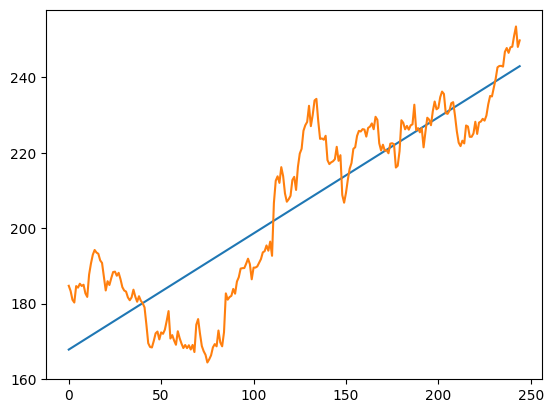

In [84]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [85]:
adf_test(prices_detrended)

ADF Statistic: -2.1698368302115196
p-value: 0.21737447419883255
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [86]:
#Using the moving average to remove trend
window_size = 12 # example window size
prices_ma = prices.rolling(window=window_size).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [87]:
adf_test(prices_detrended)

ADF Statistic: -4.434826562107417
p-value: 0.0002574246169328456
Critical Value (1%): -3.459
Critical Value (5%): -2.874
Critical Value (10%): -2.573


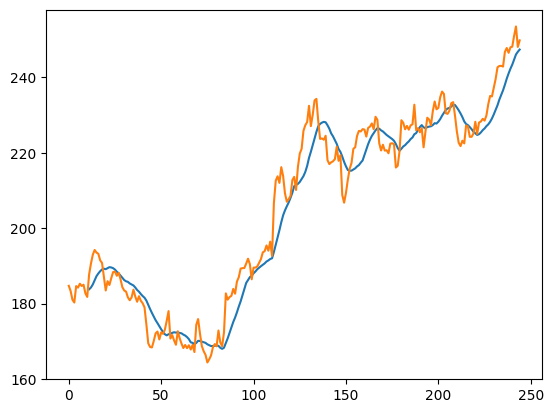

In [89]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using moving averages
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [91]:
adf_test(prices_adjusted)

ADF Statistic: -7.481760328628666
p-value: 4.751937596292864e-11
Critical Value (1%): -3.459
Critical Value (5%): -2.874
Critical Value (10%): -2.574


In [92]:
4.751937596292864e-11 < 0.05

True

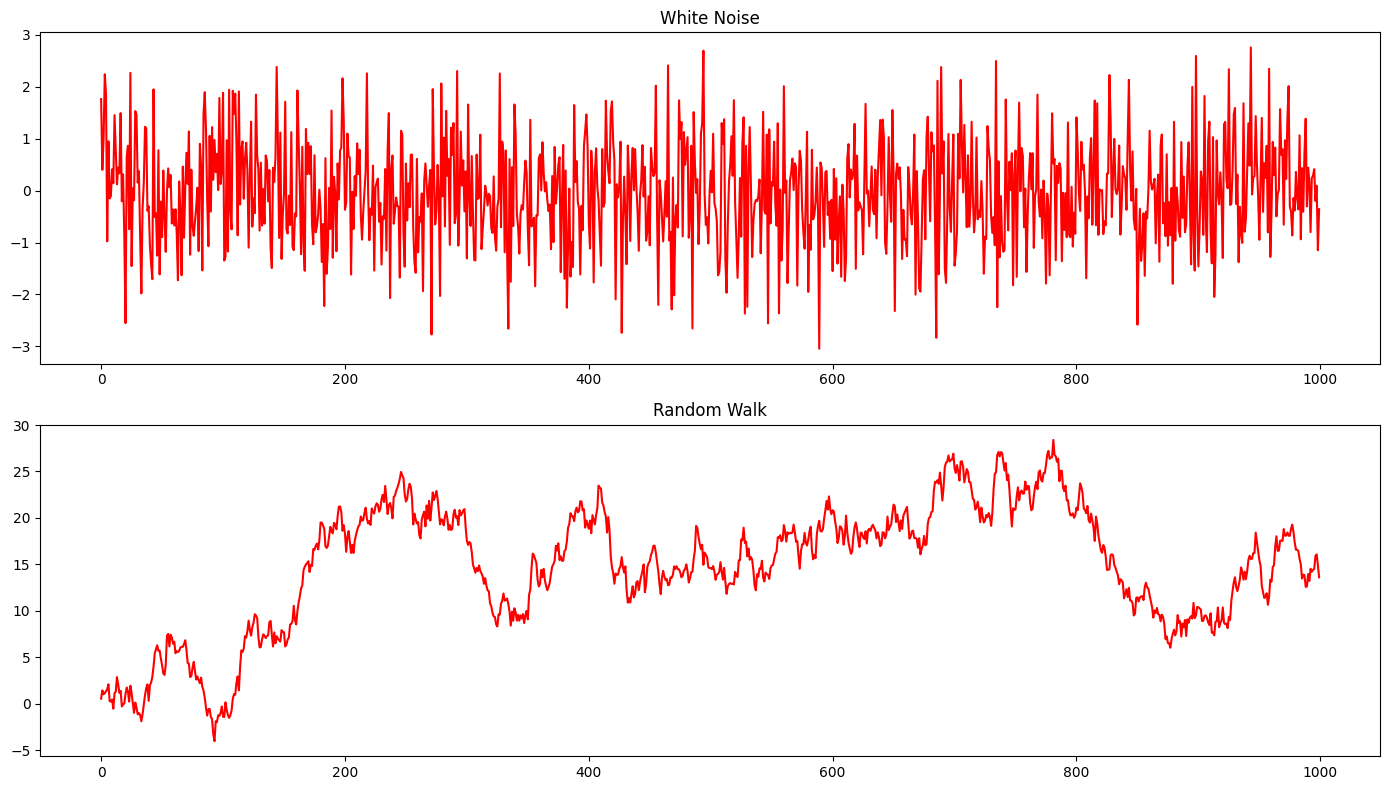


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White noise
white_noise = np.random.normal(0, 1, n)

# Random walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# plotting the series
plt.figure(figsize=(14, 8))

# Plot white noise
plt.subplot(2, 1, 1)
plt.plot(white_noise, color='red')
plt.title('White Noise')

# Plot random walk
plt.subplot(2, 1, 2)
plt.plot(random_walk, color='red')
plt.title('Random Walk')

plt.tight_layout()
plt.show()

# Ljung-Box test on the white noise
print('\nLjung-Box Test for White Noise:')
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

# Ljung-Box test on the random walk
print('\nLjung-Box Test for Random Walk:')
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)